# Homework 4: Fraud Detection

*In this homework, you are going to work with a credit card transaction dataset.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw4`</font>.

2. Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed in the notebook.**

4. When you're done, please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


*   Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
*   Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.

For any question, you may send an email to the TAs and LAs.

---

In this homework, you will work on a dataset about credit card frauds.

For this homework, you will use the provided file `creditcard_fraud.csv`. Feature engineering had already been applied to the dataset and informative features created. Names of these features are hidden for secrecy purposes to protect user identity.

Below, you can find all the set of features, provided in the dataset:
*   **Known Features**
    * time: Number of seconds elapsed between this transaction and the first transaction in the dataset
    * amount: Transaction amount

*   **Other Features**
    * V1 - V28: Hidden transaction features to protect user identities

*   **Target**
    * Class: 1 for Fraudulent transactions, 0 otherwise
    

    
*Do not forget to add the shared `creditcard_fraud.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*

In [8]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

# You can change this to the correct path
path_prefix = "./drive/My Drive"

Mounted at ./drive


In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
filename = "creditcard_fraud.csv"
df = pd.read_csv(join(path_prefix, filename))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Q1 - Ratio Between Fraudalent and Non-Fraudalent Transactions (5 Points)

The dataset is imbalanced so that non-frauds are dominant in the data. In this part you are asked to plot a pie chart and show the ratio between fraudalent and non-fraudalent transactions. Your output should be like: 

<img src="https://i.ibb.co/7KpVFG9/pie.png" alt="pie" border="0" width="300">



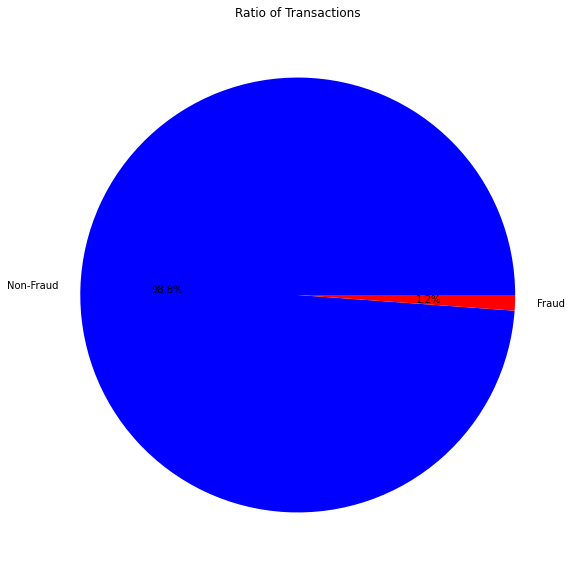

In [11]:
# Your Code
temp = df['Class'].value_counts()
plt.pie([temp[0],temp[1]], labels=["Non-Fraud","Fraud"] , autopct='%1.1f%%',colors=('blue','red'))
plt.title('Ratio of Transactions')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Q2 - Split the data into train (60%), validation (20%) and test (20%). (5 Points)

Use `train_test_split` with `random_state` parameter set to 0. Drop `Time` column since it doesn't give any information.

***Important:** Do not forget that the data is imbalanced so you should handle that with stratified splitting. Search how you can do this with `train_test_split` function*

In [12]:
from IPython.testing import test
# Your Code
df2 = df.drop(['Time','Class'],axis=1)
from sklearn.model_selection import train_test_split
classCol = np.array(df['Class'])
x_train, x_test, y_train, y_test =train_test_split(df2,classCol,random_state=0,stratify=classCol,train_size=0.6)
x_test, x_val , y_test, y_val = train_test_split(x_test,y_test,random_state=0,train_size=0.5)

## Q3 - Build 2 Baseline Models (5 Points)

You are going to build a Random Forest and a Gradient Boosting model. Set random_state = 0. Then fit the model with training data.

In [13]:
#Your Code

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Rclf = RandomForestClassifier(random_state=0,n_estimators=100)
Rclf.fit(x_train,y_train)
Gclf = GradientBoostingClassifier(random_state=0,n_estimators=100)
Gclf.fit(x_train,y_train)



GradientBoostingClassifier(random_state=0)

## Q4 - Evaluate the Baseline Model (30 Points)

There are some functions below already imported for you. You can use those functions to find results but of course there are other ways too. Those are given for you to give hints. 

### Part 1 - Plot Confusion Matrix (10 Points)

In this part you are asked to plot the Confusion Matrix for both Random Forest and Gradient Boosting model for the predictions made on the validation data. These outputs should be side by side. You can use subplots from matplotlib. 

**Note**: There are many ways to use subplots, so don't stick with one of them if it doesn't work. Two libraries are given to you for confusion matrix. However, you are free to use any other or implement it yourself. The colors of the confusion matrix don't have to be the same with the expected output.


<img src="https://i.ibb.co/JrknyR8/conf2.png" alt="conf2" border="0" width="600">

*Please keep in mind that this confusion matrix might be different than what you will get due to randomness.*

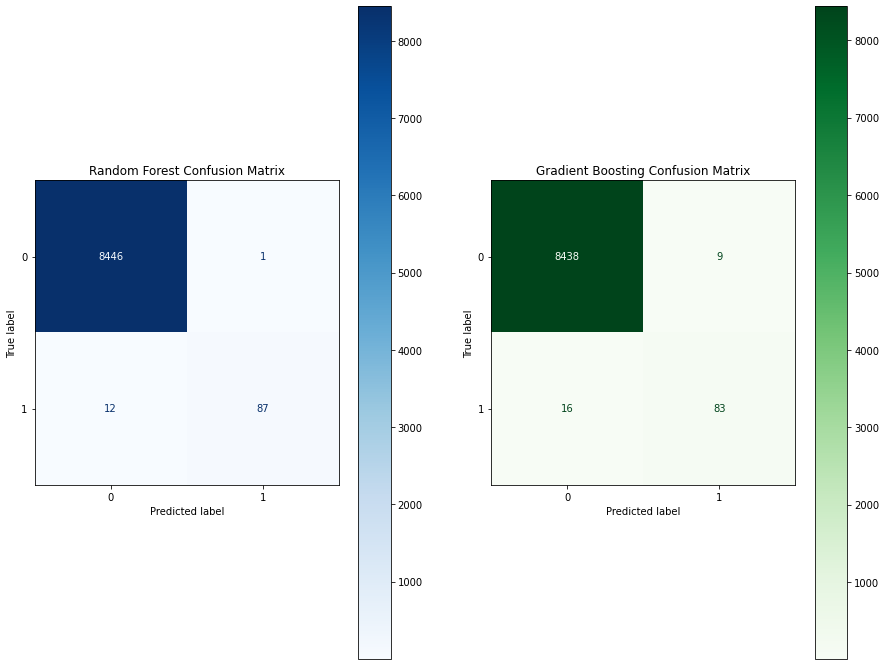

In [14]:
# Your Code

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Rpredict = Rclf.predict(x_val)
Gpredict =  Gclf.predict(x_val)

rfM = confusion_matrix(y_val,Rpredict)
gfM = confusion_matrix(y_val,Gpredict)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12))
plot_confusion_matrix(Rclf, x_val, y_val, ax=ax1, values_format='d', cmap='Blues')
plot_confusion_matrix(Gclf, x_val, y_val, ax=ax2, values_format='d', cmap='Greens')
ax1.title.set_text('Random Forest Confusion Matrix')
ax2.title.set_text('Gradient Boosting Confusion Matrix')


### Part 2 - Plot ROC Curve Evaluated on Validation Data (20 Points)

In this part you are asked to plot ROC curve of these two model's output on the validation data. You can see the expected format below.


<img src="https://i.ibb.co/5BZKHd1/curves.png" alt="curves" border="0" width="500">

*Please keep in mind that this plot might be different than what you will get due to randomness.*

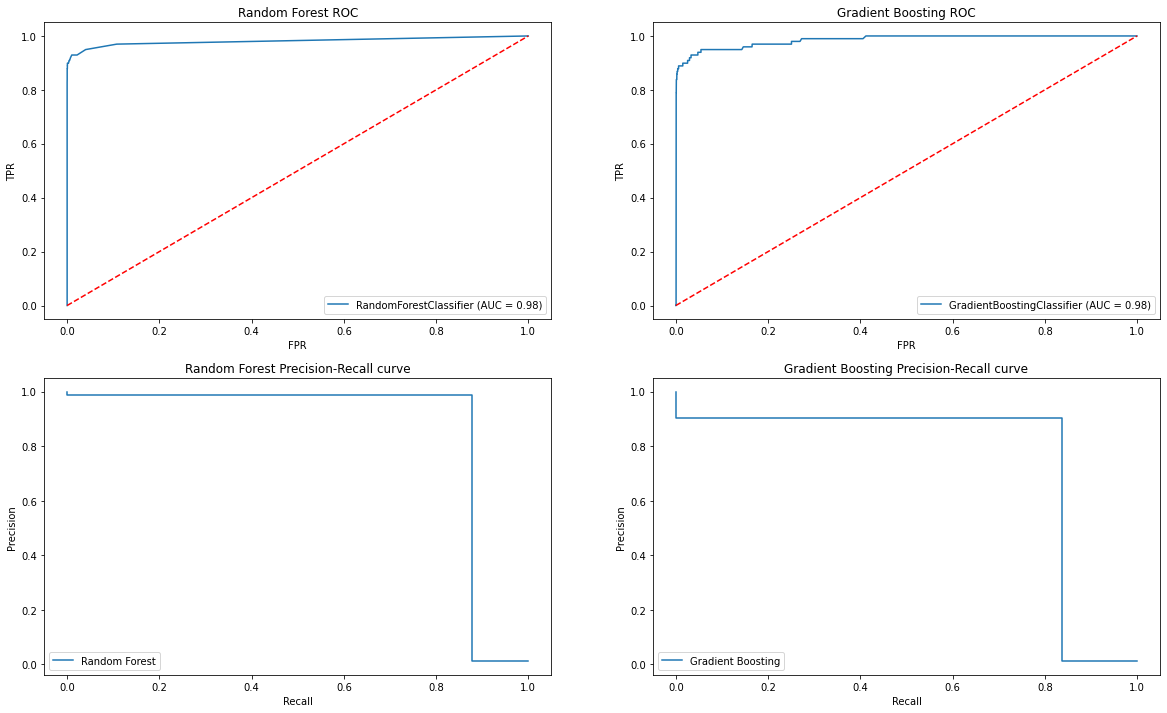

In [15]:
from sklearn import metrics
# Your Code

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 12))
metrics.plot_roc_curve(Rclf,x_val,y_val,ax=ax1)
metrics.plot_roc_curve(Gclf,x_val,y_val,ax=ax2)



ax1.plot([0, 1], [0, 1], ls="--", c=".3",color = 'red')
ax2.plot([0, 1], [0, 1], ls="--", c=".3",color = 'red')
ax1.set(xlabel='FPR',ylabel='TPR')
ax2.set(xlabel='FPR',ylabel='TPR')
ax1.title.set_text('Random Forest ROC')
ax2.title.set_text('Gradient Boosting ROC')

precision1, recall1, thresholds1 =precision_recall_curve(y_val,Rpredict)
precision2, recall2, thresholds2 = precision_recall_curve(y_val,Gpredict)

PrecisionRecallDisplay(precision1, recall1).plot(ax=ax3)
PrecisionRecallDisplay(precision2, recall2).plot(ax=ax4)

ax3.title.set_text('Random Forest Precision-Recall curve')
ax4.title.set_text('Gradient Boosting Precision-Recall curve')

ax3.legend(['Random Forest'])
ax4.legend(['Gradient Boosting'],loc='lower left')

## Q5 - Hyperparameter Tuning (40 Points)

### Part 1: Getting Hyperparameter Tuning Results (30 Points)

Now that you trained the default model and see the results, it is time to make it better with hyperparameter tuning. To evaluate the model performances you need to use AUPRC(Area Under Precision-Recall Curve). To this end, store AUPRC values for each model then decide which parameters are the best to use.

Here, you are asked to tune hyperparameters in two steps. 

**Step 1:**

In the first step, train different models dfor both algorithm separately only changing number of estimators.

Use the following values for this step:
```
'n_estimators': [50,100,300,500]
```
**Step 2:**

In the second step, train different models **only** changing max_features values. You should use the best value for the `n_estimators` that you obtained in the first step. (The best value of `n_estimators` can be different for 2 algorithm)

Use the following values for this step:
```
'max_features': [5,7,10,25]
```

**Remember that positive class is fraudalent ones.**


<img src="https://i.ibb.co/kqQqcXS/model-results.png" alt="model-results" border="0" width="350">

*Please keep in mind that this results might be different than what you will get due to randomness.*

In [16]:
from sklearn.metrics._plot.precision_recall_curve import average_precision_score
# Your Code
n_estimators = [50,100,300,500]
max_features = [5,7,10,25]

R_estROC_Arr = []
R_featROC_Arr = []
G_estROC_Arr = []
G_featROC_Arr = []

print('Random Forest:\n')
best_nEst = 0
best_AUPRC = 0.0
for n_est in n_estimators:
  Rclassifier = RandomForestClassifier(random_state=0,n_estimators=n_est)
  Rclassifier.fit(x_train,y_train)
  y_prediction = Rclassifier.predict(x_val)
  fpr, tpr, thresholds = metrics.roc_curve(y_val, y_prediction)
  average_precision = auc(fpr, tpr)
  print('n_estimators',n_est,', AUPCR score:',average_precision)
  R_estROC_Arr.append(average_precision)
  if best_AUPRC < average_precision:
    best_nEst = n_est
    best_AUPRC = average_precision
print('\nBest n_estimators for Random Forest =',best_nEst,'\n')

best_feat = 0
best_AUPRC = 0.0
for max_feat in max_features:
  Rclassifier = RandomForestClassifier(random_state=0,n_estimators=best_nEst,max_features=max_feat)
  Rclassifier.fit(x_train,y_train)
  y_prediction = Rclassifier.predict(x_val)
  fpr, tpr, thresholds = metrics.roc_curve(y_val, y_prediction)
  average_precision = auc(fpr, tpr)
  print('n_estimators',best_nEst,'max_features',max_feat, ', AUPCR score:',average_precision)
  R_featROC_Arr.append(average_precision)
  if best_AUPRC < average_precision:
    best_feat = max_feat
    best_AUPRC = average_precision
print('\nFor Random Forest, best n_estimators =',best_nEst,'and best max_features =',best_feat)


print('\nGradient Boosting:\n')
best_nEst = 0
best_AUPRC = 0.0
for n_est in n_estimators:
  Gclassifier = GradientBoostingClassifier(random_state=0,n_estimators=n_est)
  Gclassifier.fit(x_train,y_train)
  y_prediction = Gclassifier.predict(x_val)
  fpr, tpr, thresholds = metrics.roc_curve(y_val, y_prediction)
  average_precision = auc(fpr, tpr)
  print('n_estimators',n_est,', AUPCR score:',average_precision)
  G_estROC_Arr.append(average_precision)
  if best_AUPRC < average_precision:
    best_nEst = n_est
    best_AUPRC = average_precision
print('\nBest n_estimators for Graident Boosting =',best_nEst,'\n')

best_feat = 0
best_AUPRC = 0.0
for max_feat in max_features:
  Gclassifier = GradientBoostingClassifier(random_state=0,n_estimators=best_nEst,max_features=max_feat)
  Gclassifier.fit(x_train,y_train)
  y_prediction = Gclassifier.predict(x_val)
  fpr, tpr, thresholds = metrics.roc_curve(y_val, y_prediction)
  average_precision = auc(fpr, tpr)
  print('n_estimators',best_nEst,'max_features',max_feat, ', AUPCR score:',average_precision)
  G_featROC_Arr.append(average_precision)
  if best_AUPRC < average_precision:
    best_feat = max_feat
    best_AUPRC = average_precision
print('\nFor Gradient Boosting, best n_estimators =',best_nEst,'and best max_features =',best_feat)

Random Forest:

n_estimators 50 , AUPCR score: 0.9342842417306724
n_estimators 100 , AUPCR score: 0.9393347467811775
n_estimators 300 , AUPCR score: 0.9342842417306724
n_estimators 500 , AUPCR score: 0.9342842417306724

Best n_estimators for Random Forest = 100 

n_estimators 100 max_features 5 , AUPCR score: 0.9393347467811775
n_estimators 100 max_features 7 , AUPCR score: 0.9342842417306724
n_estimators 100 max_features 10 , AUPCR score: 0.9393347467811775
n_estimators 100 max_features 25 , AUPCR score: 0.9342842417306724

For Random Forest, best n_estimators = 100 and best max_features = 5

Gradient Boosting:

n_estimators 50 , AUPCR score: 0.9186591856770617
n_estimators 100 , AUPCR score: 0.9186591856770617
n_estimators 300 , AUPCR score: 0.9187775709025856
n_estimators 500 , AUPCR score: 0.9239464611786147

Best n_estimators for Graident Boosting = 500 

n_estimators 500 max_features 5 , AUPCR score: 0.9389795911046059
n_estimators 500 max_features 7 , AUPCR score: 0.934225049117

### Part 2 - Plotting Results (10 PTS)

You can see that the AUPRC scores may be better when max_features is not set than when we set it. This is because the default value of max_features might work better. However, for now, we will proceed with the results of the values we have determined.

Plot `n_estimators` vs AUPRC scores and `max_features` vs AUPRC scores using validation data with subplots. Please check the expected output to see the format

Your plots should look like below. Remember these plots are based on random allocations so it is highly possible that the values you get will not be exactly the same. However, structures should be the same.


***Hint:** You can set yticks as np.around(np.linspace(0.7,1),decimals=2) to have similar plots.*


<img src="https://i.ibb.co/9y8ZJpp/hyp-plot.png" alt="hyp-plot" border="0">

*Please keep in mind that these plots might be different than what you will get due to randomness.*

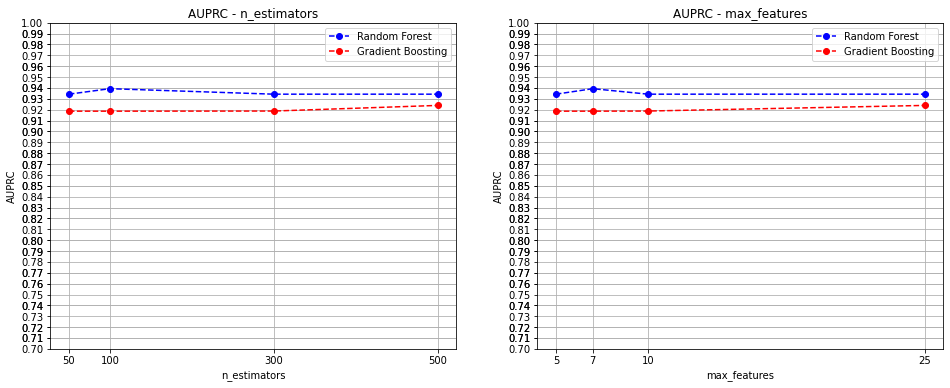

In [17]:
# Your Code
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.plot(n_estimators,R_estROC_Arr,marker='o',linestyle='dashed',color='blue')
ax1.plot(n_estimators,G_estROC_Arr,marker='o',linestyle='dashed',color='red')

ax2.plot(max_features,R_estROC_Arr,marker='o',linestyle='dashed',color='blue')
ax2.plot(max_features,G_estROC_Arr,marker='o',linestyle='dashed',color='red')

ax1.set_yticks(np.around(np.linspace(0.7,1),decimals=2))
ax2.set_yticks(np.around(np.linspace(0.7,1),decimals=2))

ax1.set_xticks(n_estimators)
ax1.grid()

ax2.set_xticks(max_features)
ax2.grid()

ax1.set_xlabel('n_estimators')
ax1.set_ylabel('AUPRC')

ax2.set_xlabel('max_features')
ax2.set_ylabel('AUPRC')

ax1.set_title('AUPRC - n_estimators')
ax2.set_title('AUPRC - max_features')

ax1.legend(loc='upper right',labels=["Random Forest",'Gradient Boosting'])
ax2.legend(loc='upper right',labels=["Random Forest",'Gradient Boosting'])

plt.show()

## Q6 - Evaluate on Test Data (20 PTS)

Here, you are asked to evaluate the final model using the test data. Select the best model among these 2 different algorithms and its best num_estimator and max features. 

### Retrain the Model

Retrain your model combining train + validation data with using the hyperparameters you have chosen (best). This part has no points but it's necessary to do the upcoming parts

In [18]:
from pandas.core.internals import concat
# Your Code

# best results inserted as parameters


combinedX = pd.concat((x_train,x_val),axis=0)
combinedY = np.concatenate((y_train,y_val))

newRclf = RandomForestClassifier(random_state=0,n_estimators=100,max_features=5)
newRclf.fit(combinedX,combinedY)

RandomForestClassifier(max_features=5, random_state=0)

### Part 1 - Plot Confusion Matrix (10 Points)

Expected Output:

<img src="https://i.ibb.co/mNKZj6q/test-conf.png" alt="test-conf" border="0" width="300">

*Please keep in mind that this confusion matrix might be different than what you will get.*

Text(0.5, 1.0, 'Confision Matrix Evaluated on Test Data')

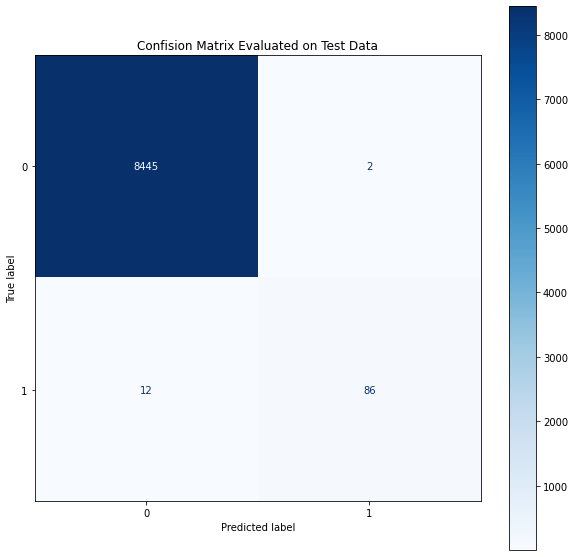

In [22]:
# Your Code

Rpredict = Rclf.predict(x_test)

rfM = confusion_matrix(y_test,Rpredict)

figure, ax =plt.subplots(1,1,figsize=(10,10))

plot_confusion_matrix(newRclf, x_test, y_test, values_format='d', cmap='Blues', ax=ax)

plt.title('Confision Matrix Evaluated on Test Data')


### Part 2 - Plot ROC Curve and Precision-Recall Curve Evaluated on Test Data (10 Points)

Expected Output:

<img src="https://i.ibb.co/9tTNp5j/test-plot.png" alt="test-plot" border="0" width="500">

*Please keep in mind that these plots might be different than what you will get due to randomness.*

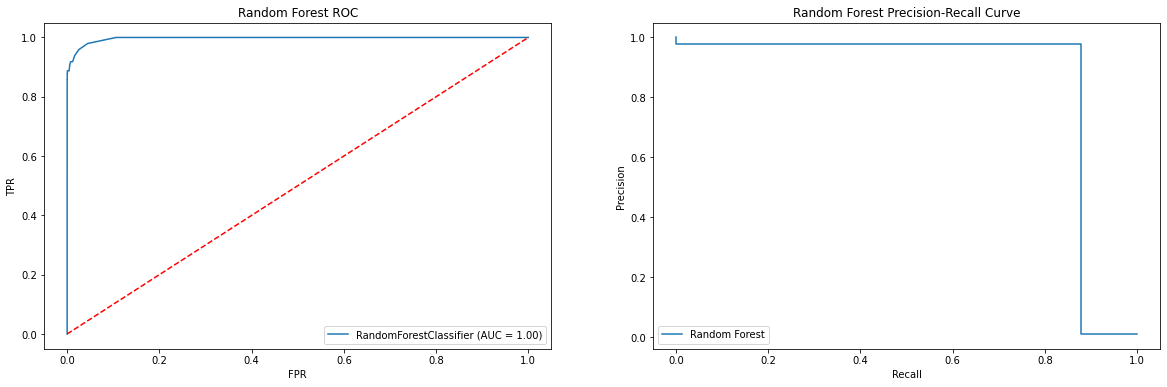

In [21]:
# Your Code

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))

metrics.plot_roc_curve(Rclf,x_test,y_test,ax=ax1)

ax1.plot([0, 1], [0, 1], ls="--", c=".3",color = 'red')

ax1.set(xlabel='FPR',ylabel='TPR')

ax1.title.set_text('Random Forest ROC')
ax2.title.set_text('Random Forest Precision-Recall Curve')

precision1, recall1, thresholds1 =precision_recall_curve(y_test,Rpredict)

PrecisionRecallDisplay(precision1, recall1).plot(ax=ax2)
ax2.legend(['Random Forest'])